In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [2]:
W = [-0.1, 0.1, -0.1, 0.1, -0.1, 0.1]

In [3]:
def f(x):
    return np.dot(W, [x**i for i in range(len(W))])

def noice():
    return np.random.uniform(-1.0, 1.0)

In [4]:
def generate_scores(data):
    return [f(x)+noice() for x in data]

def generate_toy_data(size, val_range = 10, split_size=0.5):
    X = [np.random.uniform(low=-val_range, high=val_range) for _ in range(size)]
    y = generate_scores(X)
    return X[0:int(split_size*size)], y[0:int(split_size*size)], X[int(split_size*size):], y[int(split_size*size):]

def bayes_error(X, y_with_noice):
    y = [f(x) for x in X]
    return mse_loss(y_with_noice, y)

def mse_loss(y_act, y_pred):
    return np.mean([(y1-y2)**2 for y1, y2 in zip(y_act, y_pred)])

In [5]:
X_train_full,y_train_full, X_test, y_test = generate_toy_data(50000, 1, split_size=0.9)
be = bayes_error(X_test,y_test)

In [6]:
losses = {'deg2_train':[], 'deg2_test':[], 'deg5_train':[], 'deg5_test':[]}
steps = 10
for size in np.arange(int(len(X_train_full)/steps), len(X_train_full) + 1,  int(len(X_train_full)/steps)):
    X_train = X_train_full[:size]
    y_train = y_train_full[:size]
    model_2degree = make_pipeline(PolynomialFeatures(2), Ridge())
    model_2degree.fit(np.reshape(X_train, (-1,1)), np.array(y_train))
    train_predictions = model_2degree.predict(np.reshape(X_train, (-1,1)))
    test_predictions = model_2degree.predict(np.reshape(X_test, (-1,1)))
    losses['deg2_train'].append(mse_loss(y_train, train_predictions))
    losses['deg2_test'].append(mse_loss(y_test, test_predictions))
    
    model_5degree = make_pipeline(PolynomialFeatures(5), Ridge())
    model_5degree.fit(np.reshape(X_train, (-1,1)), np.array(y_train))
    train_predictions = model_5degree.predict(np.reshape(X_train, (-1,1)))
    test_predictions = model_5degree.predict(np.reshape(X_test, (-1,1)))
    losses['deg5_train'].append(mse_loss(y_train, train_predictions))
    losses['deg5_test'].append(mse_loss(y_test, test_predictions))
    


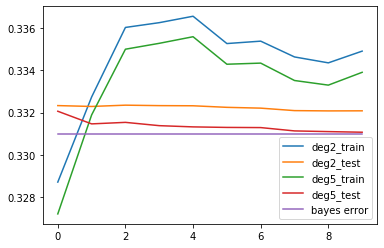

In [7]:
for tlt in losses:
     #if '5' in tlt:
            plt.plot(losses[tlt], label=tlt)
plt.plot([be for _ in range(steps)], label='bayes error')
plt.legend()